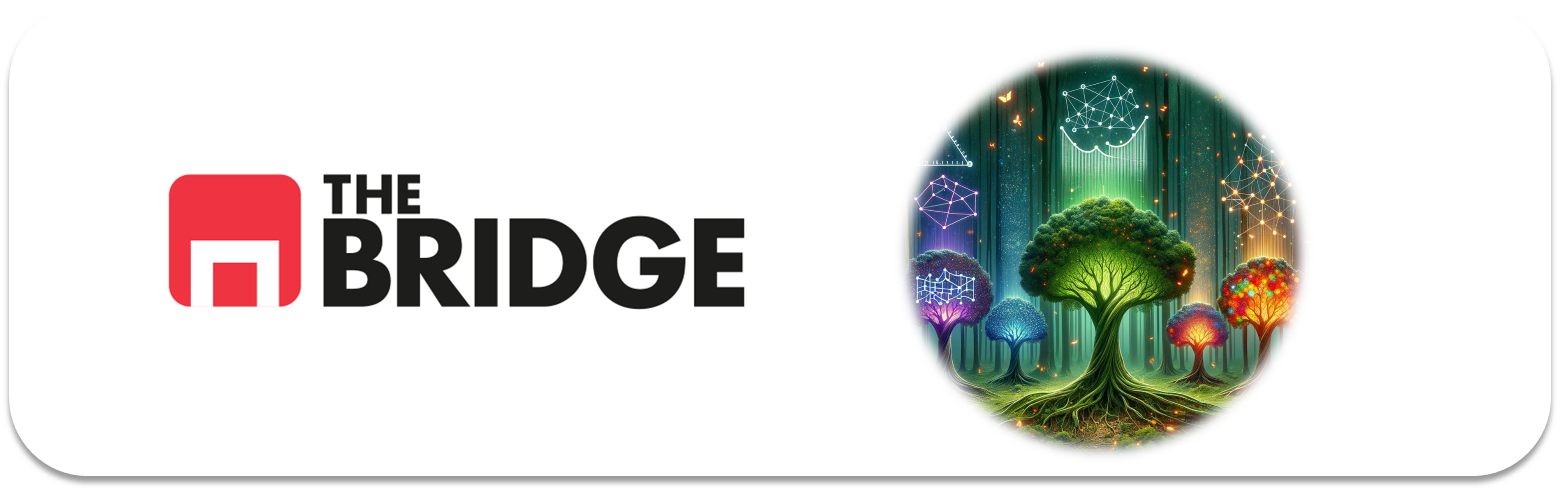

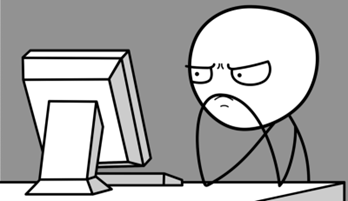

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns


### Ejercicio 1

Importa el csv "temps.csv"

In [3]:
df = pd.read_csv ("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_11/Unidad_1/Workout/data/temps.csv")

df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [7]:
# Aplicar one-hot encoding a la variable categórica 'week'
df_encoded = pd.get_dummies(df, columns=['week'], drop_first=True)

# Mostrar las primeras filas del dataset después del encoding
df_encoded.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,True,False


### Ejercicio 3

Divide en train y test

In [8]:
from sklearn.model_selection import train_test_split

# Definir características (X) y variable objetivo (y)
X = df_encoded.drop(columns=['actual'])
y = df_encoded['actual']

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verificar las dimensiones de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((278, 16), (70, 16), (278,), (70,))

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [9]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar el modelo de árbol de decisión con parámetros por defecto
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
decision_tree_regressor.fit(X_train, y_train)

# Verificar el modelo entrenado
decision_tree_regressor

DecisionTreeRegressor(random_state=42)

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [10]:
# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree_regressor.predict(X_test)

# Calcular el MAE manualmente
mae = sum(abs(y_test - y_pred)) / len(y_test)

# Mostrar el resultado del MAE
mae

5.214285714285714

### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [11]:
# Calcular el MAPE manualmente
mape = sum(abs((y_test - y_pred) / y_test)) / len(y_test) * 100

# Mostrar el resultado del MAPE
mape


8.18830239654645

### Ejercicio 7

Representa el árbol de decision

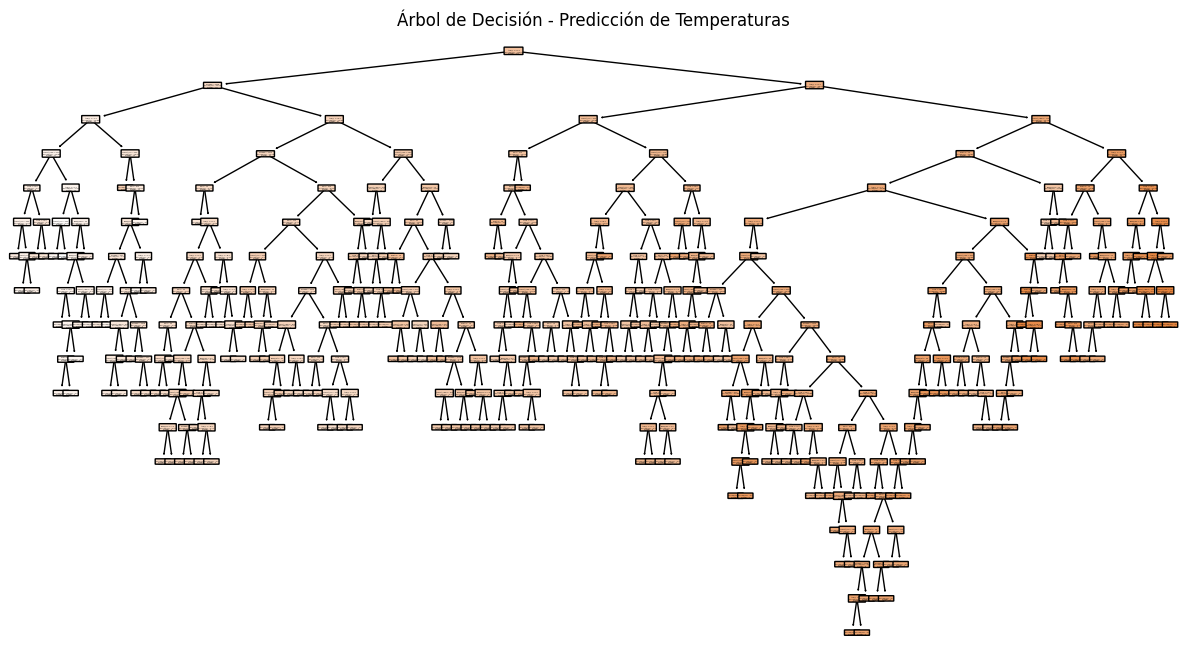

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualización del árbol de decisión
plt.figure(figsize=(15, 8))
plot_tree(decision_tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión - Predicción de Temperaturas")
plt.show()


### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [13]:
# Instanciar el modelo de árbol de decisión con max_depth=3
decision_tree_depth3 = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
decision_tree_depth3.fit(X_train, y_train)

# Verificar el modelo entrenado
decision_tree_depth3

DecisionTreeRegressor(max_depth=3, random_state=42)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [14]:
# Realizar predicciones con el modelo ajustado (max_depth=3)
y_pred_depth3 = decision_tree_depth3.predict(X_test)

# Calcular MAE manualmente
mae_depth3 = sum(abs(y_test - y_pred_depth3)) / len(y_test)

# Calcular MAPE manualmente
mape_depth3 = sum(abs((y_test - y_pred_depth3) / y_test)) / len(y_test) * 100

# Mostrar los resultados
mae_depth3, mape_depth3


(4.424444494299118, 6.938377135428464)

### Ejercicio 10

Vuelve a representar su árbol

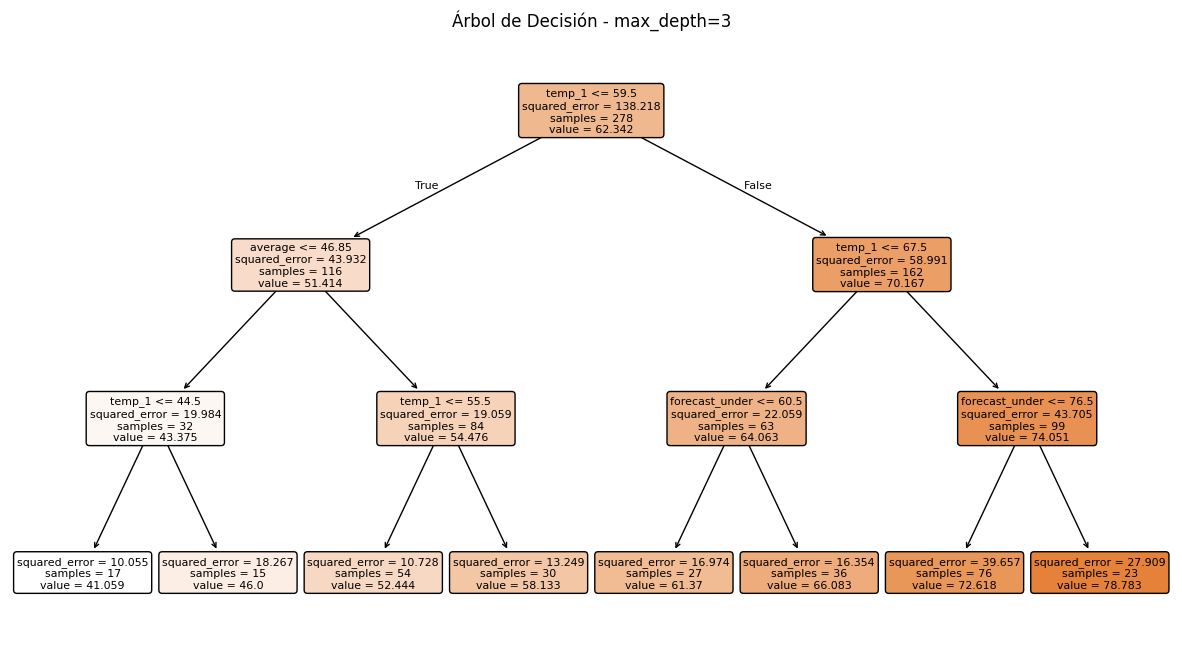

In [15]:
# Visualización del árbol de decisión con max_depth=3
plt.figure(figsize=(15, 8))
plot_tree(decision_tree_depth3, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión - max_depth=3")
plt.show()

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [16]:
# Obtener la importancia de las características del modelo
feature_importances = decision_tree_depth3.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
importances_df


,Feature,Importance
4,temp_1,0.880208
5,average,0.088412
8,forecast_under,0.031381
0,year,0.000000
1,month,0.000000
2,day,0.000000
3,temp_2,0.000000
6,forecast_noaa,0.000000
7,forecast_acc,0.000000
9,friend,0.000000
